# Setup do Projeto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
from scipy.stats import boxcox

In [2]:
df = pd.read_csv("datasets/inflacao.csv")

In [3]:
df.head(3)

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,4.48,4.70,4.70,0.0,0.0,0.0,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,7.83,9.53,14.23,0.0,0.0,0.0,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,12.17,12.80,27.03,0.0,0.0,0.0,0.0,0.0,2932.8,False


In [4]:
df.tail(3)

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
517,2023-02,2023,2,202302,0.84,1.37,5.60,0.76,1.31,5.63,...,1.06,0.05,0.51,0.21,0.53,13.75,13.65,7.62,1302.0,False
518,2023-03,2023,3,202303,0.71,2.09,4.65,0.69,2.01,5.36,...,1.45,0.30,0.81,0.18,0.71,13.75,13.65,8.60,1302.0,False
519,2023-04,2023,4,202304,0.61,2.72,4.18,0.57,2.59,4.16,...,1.88,0.14,0.95,0.23,0.94,13.75,13.65,9.09,1302.0,False


### Dataframe do IPCA

In [5]:
df_ipca = pd.DataFrame(data=df.ipca_variacao.values, index=df.referencia, columns=["ipca_variacao"])

In [6]:
df_ipca.index = pd.to_datetime(df_ipca.index, format='%Y-%m-%d')

In [7]:
df_ipca.head(3)

,ipca_variacao
referencia,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04


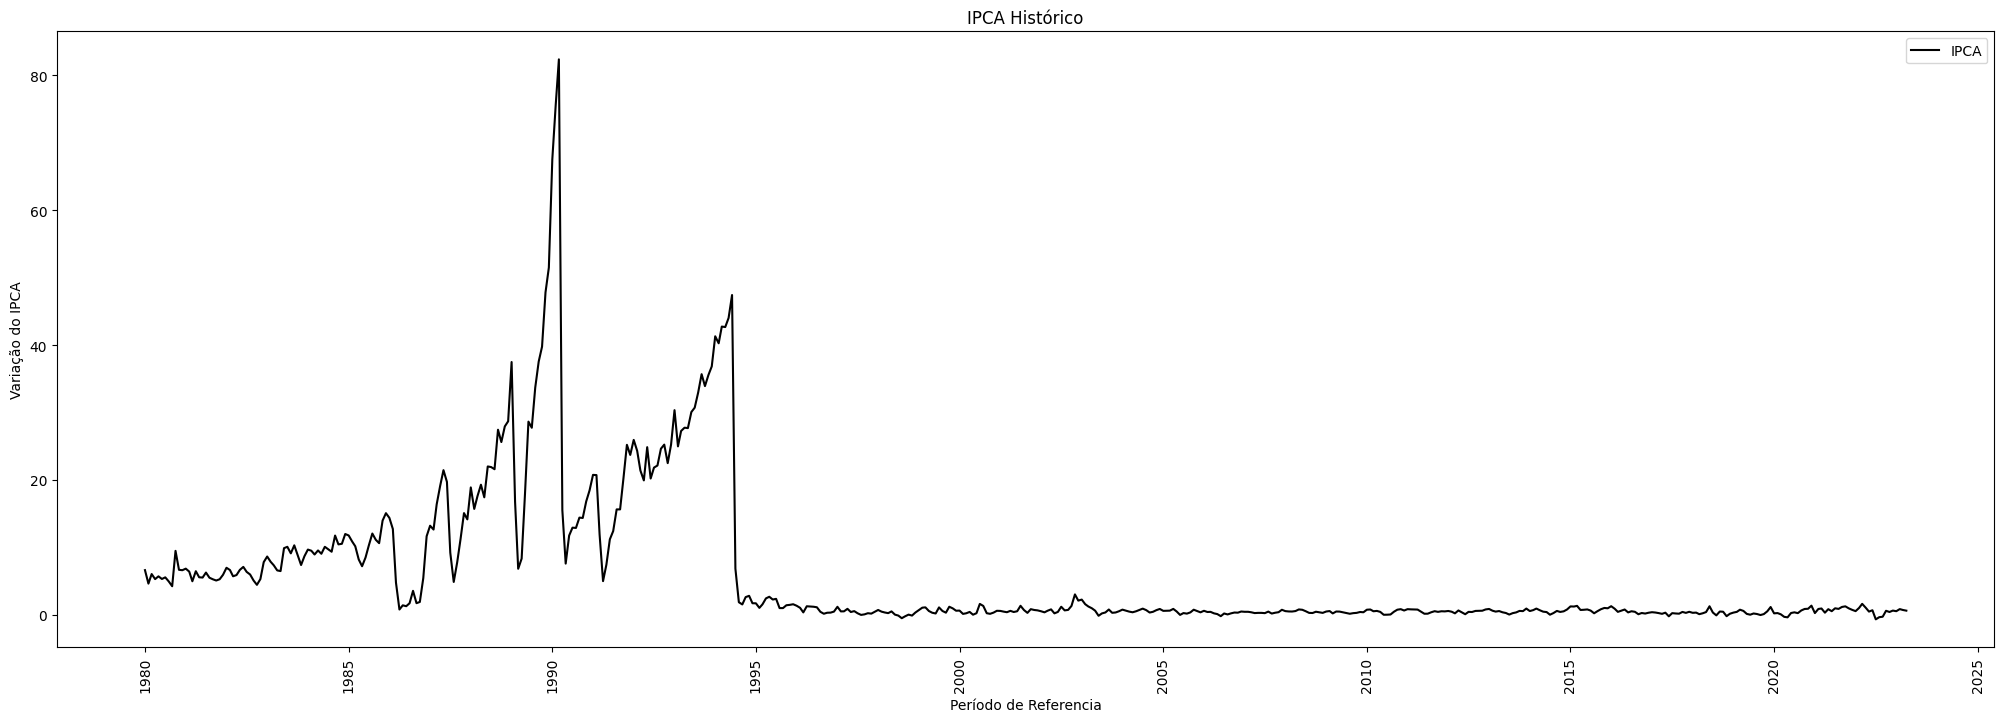

In [8]:
plt.figure(figsize=(25, 8))
plt.plot(df_ipca, label="IPCA", color='black')

plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")

plt.xticks(rotation=90)

plt.title("IPCA Histórico")
plt.legend()
plt.show()

In [9]:
df_ipca = df_ipca[df_ipca.index >= "2007-01-01"]

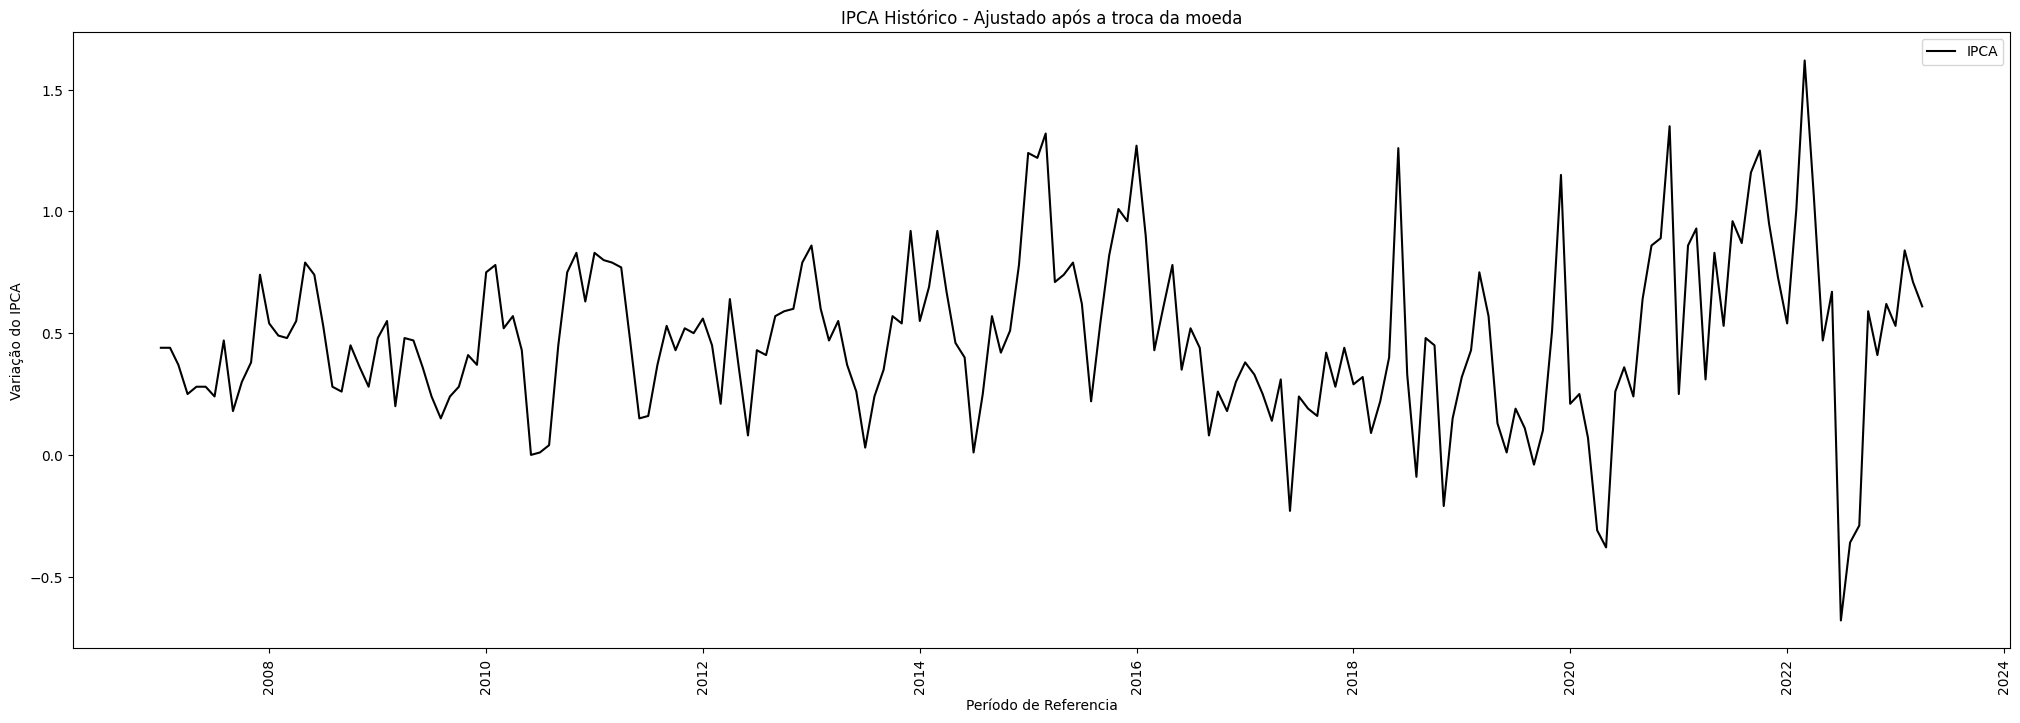

In [10]:
plt.figure(figsize=(25, 8))
plt.plot(df_ipca, label="IPCA", color='black')

plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")

plt.xticks(rotation=90)

plt.title("IPCA Histórico - Ajustado após a troca da moeda")
plt.legend()
plt.show()

#### Checando a distribuição da variação do IPCA

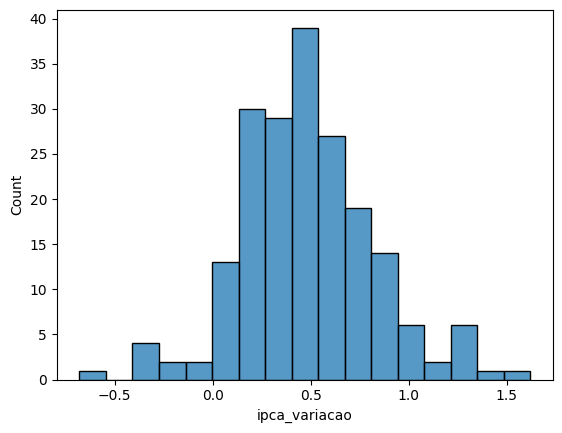

In [11]:
sns.histplot(df_ipca.ipca_variacao);

## Verificando se a série é estacionária 

In [12]:
result = adfuller(df_ipca.ipca_variacao)

In [13]:
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -7.107909992270398
p-value: 4.008800269843788e-10
Critical Values:
	1%: -3.464337030867007
	5%: -2.876478799035722
	10%: -2.574733103221565


* A estatística ADF está próximo dos valores críticos e o p-valor é menor que o limite (0,05). 
* Assim, podemos concluir que a série temporal é estacionária.

In [14]:
#df_log = np.log(df_ipca.ipca_variacao)
#plt.plot(df_log);

## Datasets de Treino e Teste

In [15]:
train = df_ipca[df_ipca.index <= "2021-01-01"]

In [16]:
test = df_ipca[df_ipca.index >= "2021-01-01"]

In [17]:
train.shape

(169, 1)

In [18]:
test.shape

(28, 1)

## Arima - Autoarima

In [19]:
# sarima_model = auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0, start_D=0,
#                      max_p=6, max_q=6, max_P=6, max_Q=6, max_D=6, seasonal=True,
#                      stepwise=True, suppress_warnings=True,
#                      error_action='ignore', m=12, trace=True, jobs=-1)

In [53]:
# sarima_model=auto_arima(train,
#                     test="adf",
#                     start_p=0,
#                     start_q=0,
#                     d=0,
#                     max_p=6,
#                     max_q=6,
#                     max_d=2,
#                     start_P=1,
#                     start_Q=1,
#                     D=1,
#                     max_P=2, max_D=1, max_Q=2, max_order=5,
#                     m=1,
#                     seasonal=False,
#                     trace=True,
#                     error_action='ignore',suppress_warnings=True,
#                     stepwise=True)

In [217]:
sarima_model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, max_d=8, # maximum p, q and d
                      m=1,              # frequency of series
                      
                      d=1,              # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54.549, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=51.487, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=47.251, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=52.552, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=28.433, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=26.636, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26.721, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=26.089, Time=0.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=25.515, Time=0.13 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=16.927, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=25.815, Time=0.21 sec
 ARIMA(1,

In [218]:
# sarima_model = auto_arima(train, start_p=1, start_q=1,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=4, max_q=4, # maximum p, q
#                       m=1,              # frequency of series
                      
#                       d=None,           # let model determine 'd'
                      
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

In [219]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(2, 1, 4)   Log Likelihood                   0.055
Date:                Thu, 18 May 2023   AIC                             13.890
Time:                        09:55:37   BIC                             35.758
Sample:                    01-01-2007   HQIC                            22.765
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3164      0.086     15.251      0.000       1.147       1.486
ar.L2         -0.8073      0.078    -10.304      0.000      -0.961      -0.654
ma.L1         -1.7280      0.089    -19.344      0.000      -1.903      -1.553
ma.L2          1.0572      0.150      7.030      0.000       0.762       1.352
ma.L3          0.1080      0.147      0.736      0.462      -0.179       0.395
ma.L4         -0.3963      0.082     -4.829      0.000      -0.557      -0.235
sigma2         0.0575      0.005     10.497      0.000       0.047       0.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.89
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               3.35   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [220]:
predictions = sarima_model.predict(n_periods=len(test.index))

In [221]:
predictions

2021-02-01    0.191109
2021-03-01    0.379895
2021-04-01    0.304193
2021-05-01    0.276875
2021-06-01    0.302029
2021-07-01    0.357197
2021-08-01    0.409515
2021-09-01    0.433851
2021-10-01    0.423649
2021-11-01    0.390573
2021-12-01    0.355266
2022-01-01    0.335489
2022-02-01    0.337958
2022-03-01    0.357176
2022-04-01    0.380480
2022-05-01    0.395645
2022-06-01    0.396794
2022-07-01    0.386064
2022-08-01    0.371011
2022-09-01    0.359857
2022-10-01    0.357326
2022-11-01    0.362999
2022-12-01    0.372511
2023-01-01    0.380452
2023-02-01    0.383228
2023-03-01    0.380470
2023-04-01    0.374599
2023-05-01    0.369097
Freq: MS, dtype: float64

### RSME - Root Squared Mean Error

In [222]:
rmse = np.sqrt(mean_squared_error(test, predictions))

In [223]:
rmse

0.5446135115679316

## Teste

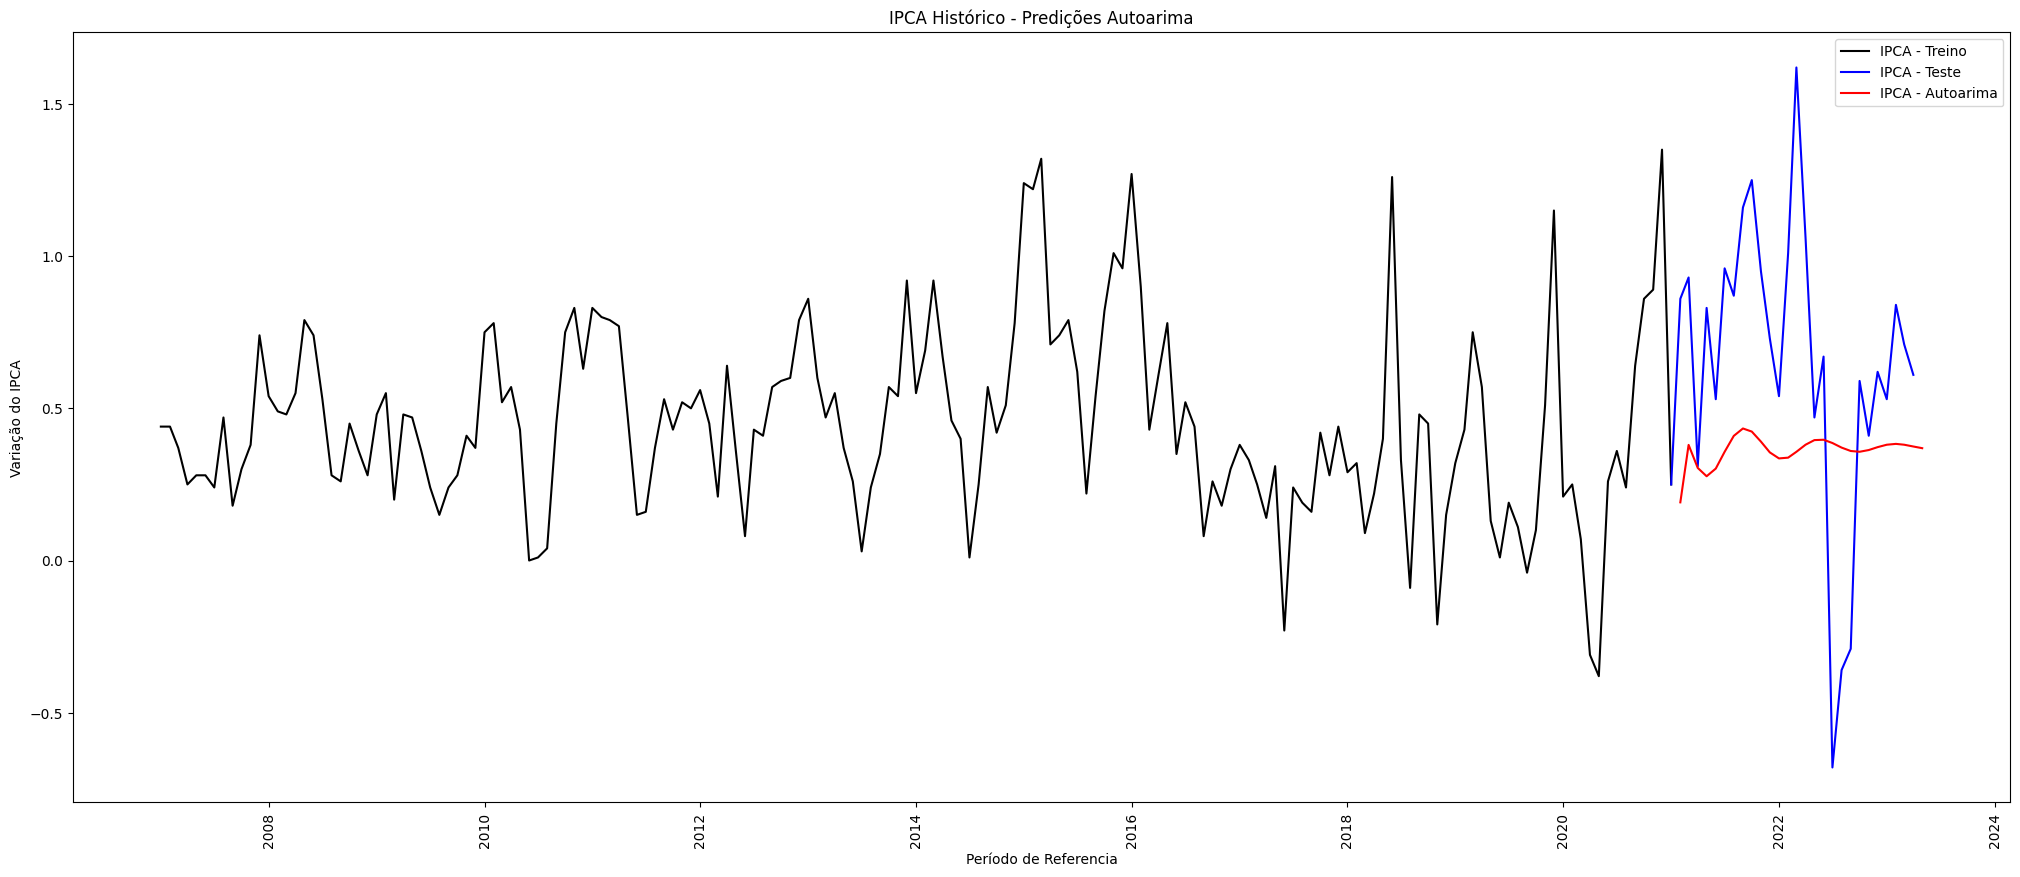

In [224]:
plt.figure(figsize=(25, 10))
plt.plot(train, label="IPCA - Treino", color='black')
plt.plot(test, label="IPCA - Teste", color='blue')
plt.plot(predictions, label="IPCA - Autoarima", color='red')
plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")

plt.xticks(rotation=90)

plt.title("IPCA Histórico - Predições Autoarima")
plt.legend()
plt.show()

### Arima Manual

## Box-Cox

In [31]:
df_ipca_box_cox = train[train.ipca_variacao > 0]

In [32]:
df_ipca_box_cox.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2007-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ipca_variacao  162 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [33]:
df_ipca_box_cox.head(1)

,ipca_variacao
referencia,
2007-01-01,0.44


In [34]:
X = df_ipca_box_cox.values.flatten()

In [35]:
transformed, lam = boxcox(X)
print('Lambda: %f' % lam)

Lambda: 0.538367


In [36]:
transformed.shape

(162,)

In [37]:
df_ipca_box_cox.shape

(162, 1)

In [38]:
df_ipca_box_cox['ipca_variacao'] = transformed
#df_ipca_box_cox['ipca_variacao_box_cox'] = transformed.tolist()

/var/folders/ht/zw2nx83j6w387qgthkq66lg80000gn/T/ipykernel_38670/3060325441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipca_box_cox['ipca_variacao'] = transformed


In [39]:
df_ipca_box_cox

,ipca_variacao
referencia,
2007-01-01,-0.663568
2007-02-01,-0.663568
2007-03-01,-0.769903
2007-04-01,-0.976841
2007-05-01,-0.921439
...,...
2020-09-01,-0.396721
2020-10-01,-0.144862
2020-11-01,-0.112954


In [40]:
sarima_model_bc=auto_arima(df_ipca_box_cox,
                    test='adf',
                    start_p=0,
                    start_q=0,
                    d=0,
                    max_p=6,
                    max_q=6,
                    max_d=2,
                    start_P=1,
                    start_Q=1,
                    D=1,
                    max_P=2, max_D=1, max_Q=2, max_order=5,
                    m=12,
                    seasonal=True,
                    trace=True,
                    error_action='ignore',suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=228.496, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=170.966, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=226.622, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=188.543, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=151.488, Time=0.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=196.429, Time=0.23 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=153.414, Time=0.59 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=153.410, Time=0.53 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=159.823, Time=0.32 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=155.387, Time=0.57 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=149.49

In [41]:
predictions_bc = sarima_model_bc.predict(n_periods=len(test.index))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
predictions_bc

162   -0.593515
163   -0.969847
164   -0.965480
165   -1.026969
166   -0.861491
167   -0.782017
168   -1.174534
169   -0.818450
170   -0.499562
171   -0.100803
172   -0.353791
173   -0.773305
174   -0.530281
175   -1.071630
176   -0.919111
177   -0.926098
178   -0.623377
179   -0.657961
180   -1.180293
181   -1.139361
182   -0.708797
183   -0.601373
184   -0.679128
185   -0.709743
186   -0.254530
187   -1.053043
188   -0.948746
189   -1.142331
dtype: float64

### Comportamento do Modelo

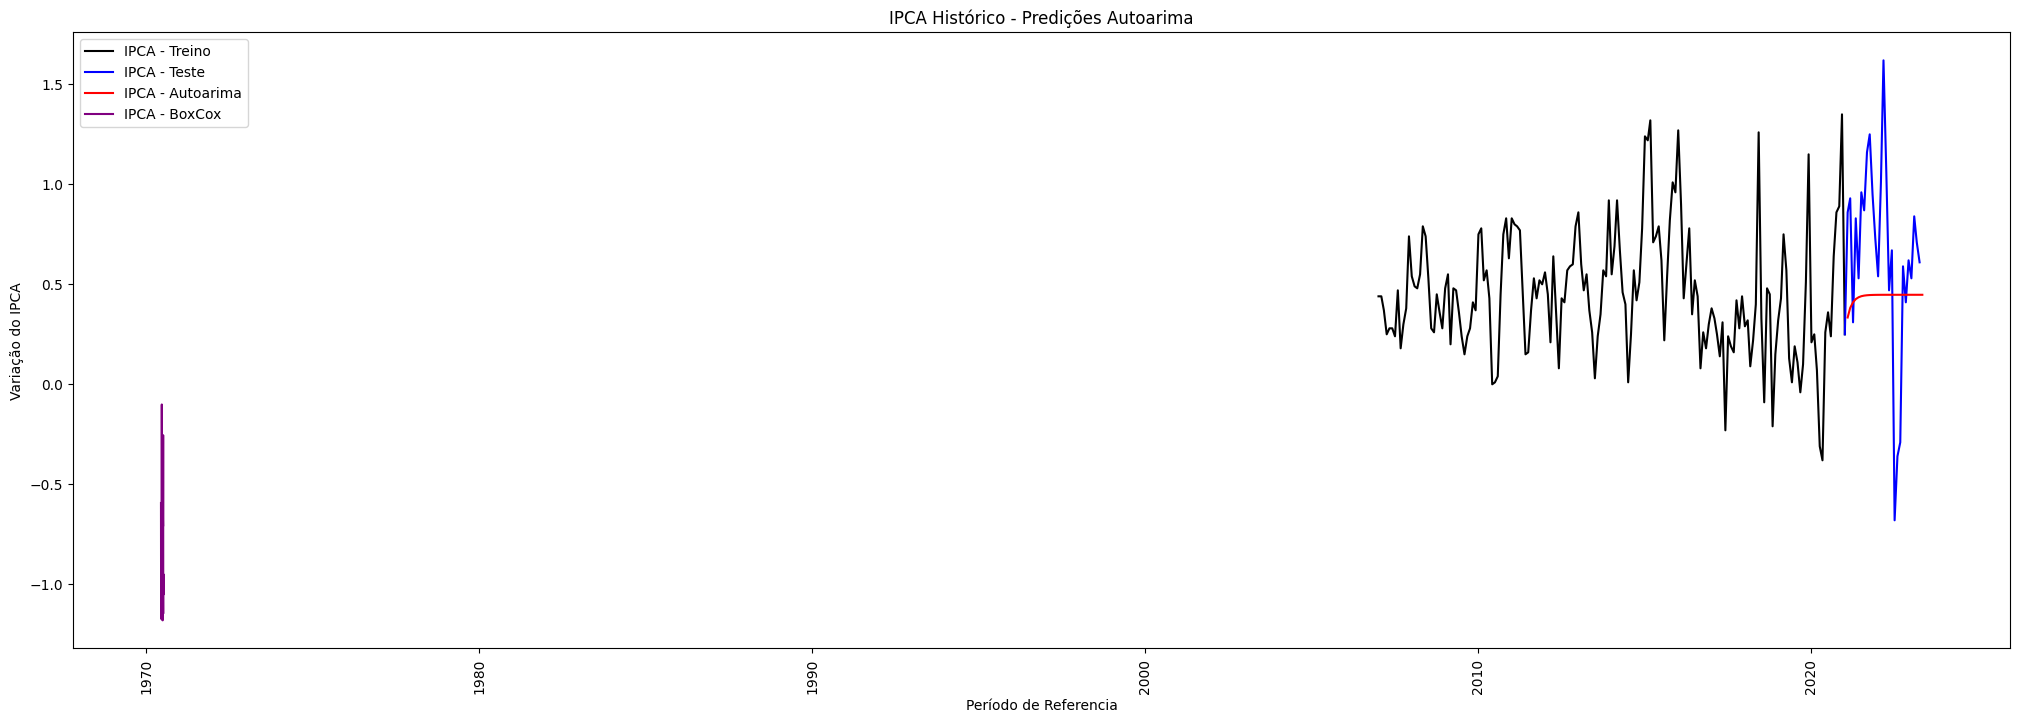

In [43]:
plt.figure(figsize=(25, 8))
plt.plot(train, label="IPCA - Treino", color='black')
plt.plot(test, label="IPCA - Teste", color='blue')
plt.plot(predictions, label="IPCA - Autoarima", color='red')
plt.plot(predictions_bc, label="IPCA - BoxCox", color='purple')
plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")

plt.xticks(rotation=90)

plt.title("IPCA Histórico - Predições Autoarima")
plt.legend()
plt.show()